## Klasifikasi Tingkatan Kualitas Susu Menggunakan Machine Learning: Perbandingan K-Nearest Neighbors (KNN) dan Support Vector Machines (SVM)

## Ringkasan dan Masalah Project

 Proyek ini berfokus pada analisis dan prediksi mutu susu berdasarkan Kumpulan data yang terdiri dari delapan fitur, termasuk pH, suhu, rasa, bau, lemak, kekeruhan, warna, dan variabel target, mutu

 Penilaian kualitas susu sangat penting dalam industri susu untuk memastikan keamanan dan kepuasan konsumen. Pengujian kualitas susu secara manual dapat memakan waktu dan subjektif. Mengotomatiskan proses ini menggunakan machine learning yang dapat memberikan metode yang lebih akurat dan efisien untuk menilai kualitas susu. Tantangan utamanya adalah memprediksi mutu susu secara akurat berdasarkan sifat-sifatnya menggunakan model pembelajaran mesin

## Tujuan yang ingin dicapai
Proyek ini bertujuan untuk mengklasifikasikan tingkat kualitas susu menggunakan teknik machine learning, khususnya membandingkan kinerja K-Nearest Neighbors (KNN) dan Support Vector Machines (SVM).

## Skema klasifikasi

![Alternative text](skema-klasifikasi.png)


# Menginstal paket Python yang dibutuhkan seperti : pandas, numpy, scikit-learn, matplotlib, dan seaborn.

In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Mengimpor dataset yang diperlukan.

In [2]:
url = 'milknew.csv'
df = pd.read_csv(url)
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:


# # informasi dasar tentang dataset
# print("\nDataset Information:")
# print(df.info())

# # Statistik ringkasan dari dataset
# print("\nDataset Summary Statistics:")
# print(df.describe())


## Melakukan proses untuk eksplorasi data, praproses, dan persiapan melatih model machine learning. 


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB
None

Dataset Summary Statistics:
                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000 

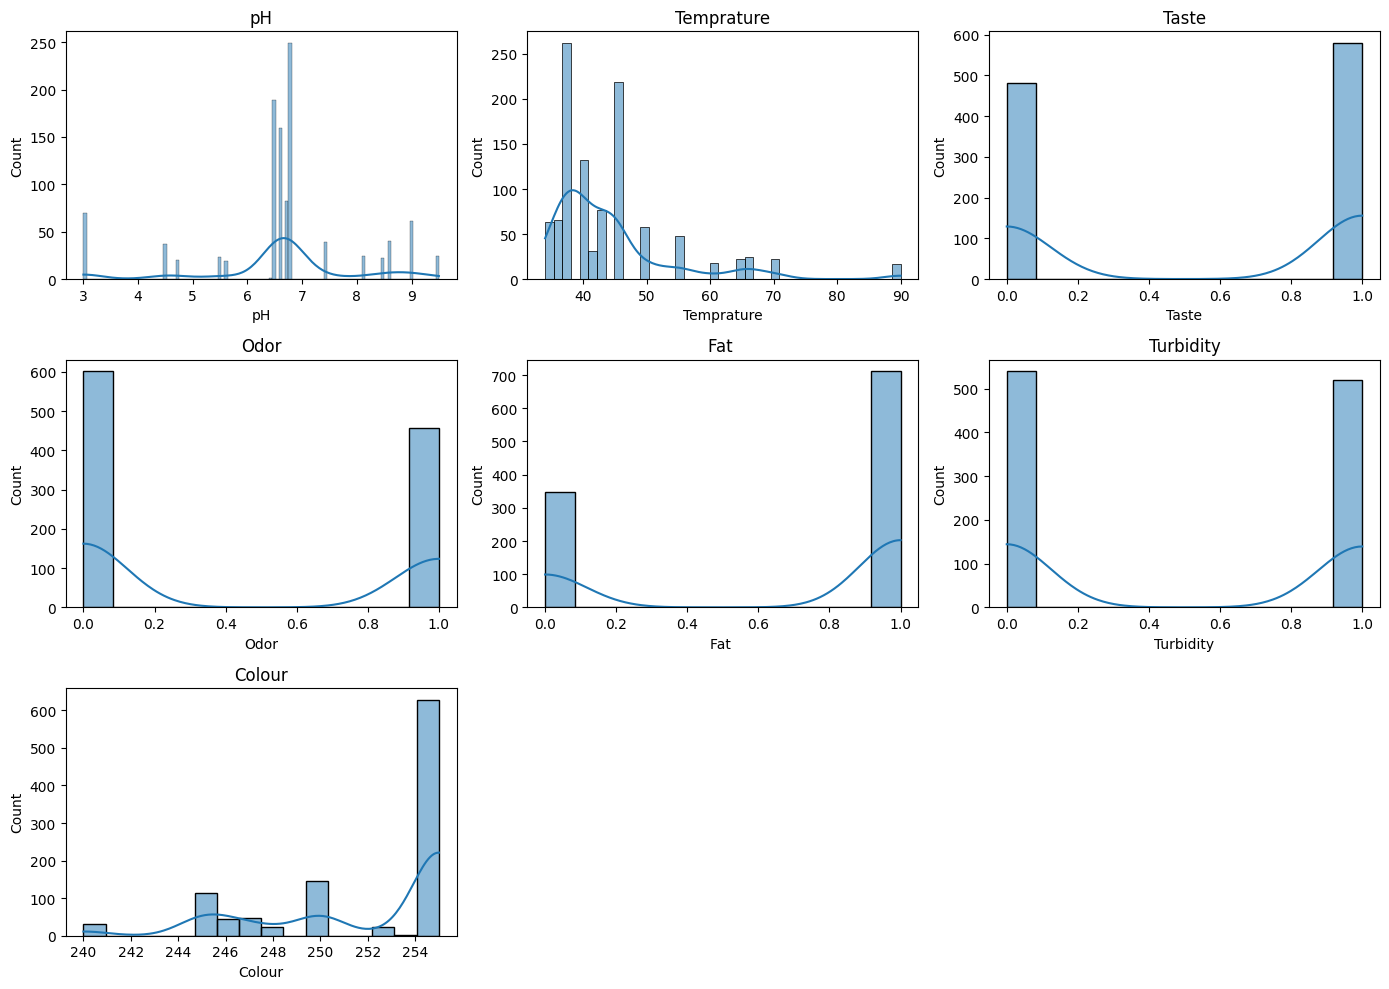

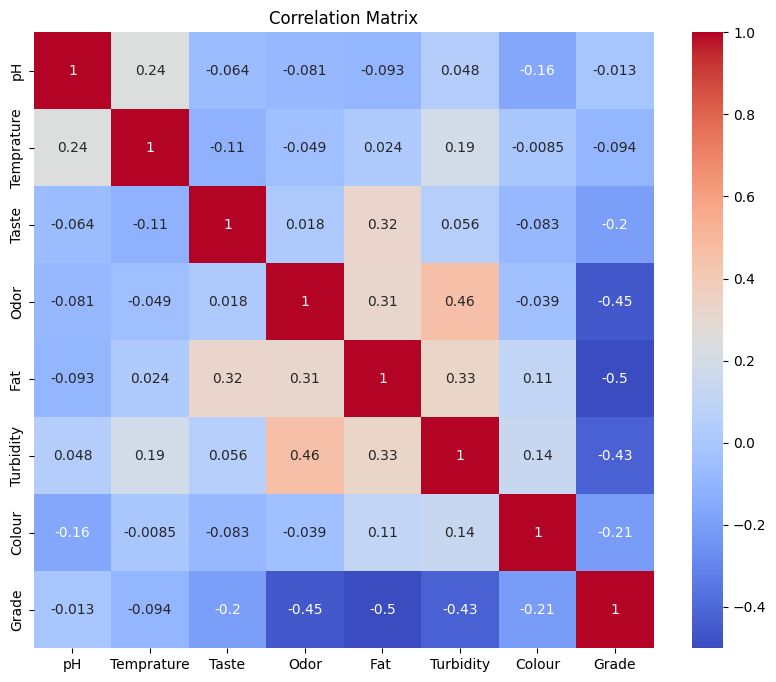


Scaled X_train example:
[[-0.01298657 -0.73413845  0.93338744  1.12519112  0.66666667  0.98792712
   0.72665791]
 [-0.01298657 -0.73413845  0.93338744  1.12519112  0.66666667  0.98792712
   0.72665791]
 [-1.35738312 -0.63281668  0.93338744 -0.88873791  0.66666667 -1.01222041
   0.72665791]
 [-0.7205637   0.58304458 -1.07136646  1.12519112  0.66666667  0.98792712
   0.72665791]
 [-0.08374428 -0.73413845 -1.07136646 -0.88873791 -1.5        -1.01222041
   0.72665791]]


In [4]:
# Convert the 'Grade' column to numeric using label encoding
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])

# Informasi dasar tentang dataset
print("\nDataset Information:")
print(df.info())

# Statistik ringkasan dari dataset
print("\nDataset Summary Statistics:")
print(df.describe())

# Periksa nilai yang hilang
print("\nMissing Values:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Plot distribusi fitur
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pisahkan fitur (X) dan target (y)
X = df.drop('Grade', axis=1)
y = df['Grade']

# Jika ada variabel kategorikal, ubah menjadi numerik menggunakan one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    X = pd.get_dummies(X, columns=categorical_features)

# Pisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mencetak beberapa contoh data yang diskalakan
print("\nScaled X_train example:")
print(X_train_scaled[:5])  # cetak 5 baris pertama

## Menggunakan GridSearchCV untuk menemukan hiperparameter terbaik dalam pengklasifikasi K-Nearest Neighbors (KNN)

In [5]:
# Tentukan kisi parameter untuk GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}  # Variasi dari K

knn = KNeighborsClassifier()

# Gunakan GridSearchCV untuk mencari K value terbaik
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Menampilkan parameter terbaik
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Menggunakan model terbaik yang ditemukan GridSearchCV
best_knn = grid_search_knn.best_estimator_

Best parameters for KNN: {'n_neighbors': 3}


## Melakukan cross-validation untuk mengevaluasi performa model Machine Learning

In [6]:
# Melakukan cross-validation and mencetak scores
cv_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5)
print(f'Cross Validation Scores for KNN: {cv_scores_knn}')
print(f'Average Cross Validation Score for KNN: {cv_scores_knn.mean()}')


Cross Validation Scores for KNN: [1.         0.97972973 0.98648649 1.         1.        ]
Average Cross Validation Score for KNN: 0.9932432432432432


## Proses penyetelan hiperparameter menggunakan GridSearchCV dengan pengklasifikasi Support Vector Machine (SVM)

In [7]:
# Menentukan parameter grid untuk GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # Variations of SVM parameters

svm = SVC()

# Menggunakan GridSearchCV untuk menemukan parameter terbaik SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Menampilkan paramter terbaik
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Menggunakan model terbaik yang ditemukan GridSearchCV
best_svm = grid_search_svm.best_estimator_


Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


## Melakukan cross-validation untuk mengevaluasi kinerja pengklasifikasi Support Vector Machine (SVM) 

In [8]:
# Melakukan cross-validation and mencetak scores
cv_scores_svm = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f'Cross Validation Scores for SVM: {cv_scores_svm}')
print(f'Average Cross Validation Score for SVM: {cv_scores_svm.mean()}')

Cross Validation Scores for SVM: [0.95973154 0.94594595 0.93243243 0.98648649 0.94594595]
Average Cross Validation Score for SVM: 0.9541084708869944


## Proses mengevaluasi pengklasifikasi k-nearest neighbour (KNN) ( best_knn) pada kumpulan data uji ( X_test_scaled, y_test)

Accuracy for KNN: 0.9905660377358491
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       0.99      0.98      0.99       115
           2       0.99      0.99      0.99       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



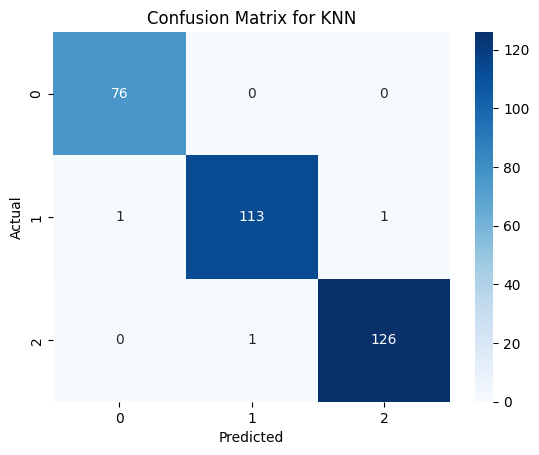

In [9]:
# Predict dan evaluate KNN
y_pred_knn = best_knn.predict(X_test_scaled)
print("Accuracy for KNN:", accuracy_score(y_test, y_pred_knn))
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix untuk KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()


## Melakukan evaluasi pengklasifikasi Support Vector Machine (SVM) ( best_svm) pada kumpulan data uji ( X_test_scaled, y_test)

Accuracy for SVM: 0.9528301886792453
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        76
           1       1.00      0.99      1.00       115
           2       0.96      0.93      0.94       127

    accuracy                           0.95       318
   macro avg       0.95      0.95      0.95       318
weighted avg       0.95      0.95      0.95       318



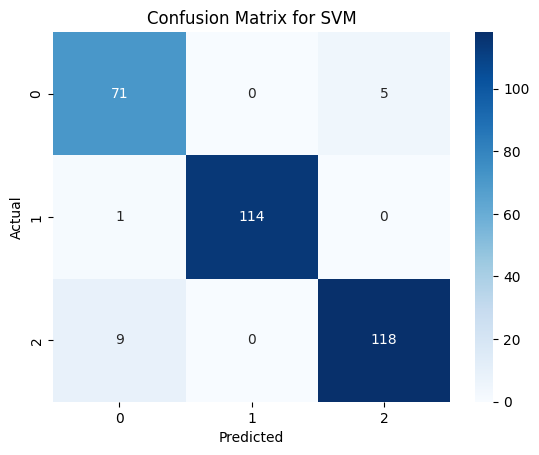

In [10]:
# Predict dan evaluate SVM
y_pred_svm = best_svm.predict(X_test_scaled)
print("Accuracy for SVM:", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix untuk SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

## Penggunaan Machine Learning dengan model (KNN dan SVM) untuk memprediksi nilai data baru ( new_data)

In [11]:
# Menampilkan nama fitur dari data training
print(X_train.columns)

# Contoh data baru untuk prediksi (pastikan jumlah fitur sudah benar)
new_data = pd.DataFrame([[6.9, 4.5, 3.4, 8.1, 2.2, 6.5, 7.3]], 
                        columns=['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'])

# Standardize data baru
new_data_scaled = scaler.transform(new_data)

# Memprediksi nilai data baru dengan KNN
prediction_knn = best_knn.predict(new_data_scaled)
predicted_grade_knn = label_encoder.inverse_transform(prediction_knn)
print("Predicted Grade with KNN:", predicted_grade_knn)

# Memprediksi nilai data baru dengan SVM
prediction_svm = best_svm.predict(new_data_scaled)
predicted_grade_svm = label_encoder.inverse_transform(prediction_svm)
print("Predicted Grade with SVM:", predicted_grade_svm)


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')
Predicted Grade with KNN: ['medium']
Predicted Grade with SVM: ['low']


## Diskusi Hasil dan Kesimpulan

### Diskusi Hasil
- **K-Nearest Neighbors (KNN):** Model ini memberikan hasil yang baik namun performa bisa sangat tergantung pada parameter K yang dipilih. Cross-validation menunjukkan performa yang stabil.
- **Support Vector Machines (SVM):** Model ini juga memberikan hasil yang baik dan dapat menangani data dengan lebih baik dalam beberapa kasus. Parameter C dan kernel sangat mempengaruhi performa model.

### Kesimpulan
Dari hasil evaluasi model, KNN dan SVM keduanya memberikan performa yang baik dalam mengklasifikasikan kualitas susu berdasarkan fitur-fitur yang tersedia. Pemilihan model akhir dapat bergantung pada kebutuhan spesifik dan kompleksitas data.

### Saran
Untuk pengembangan lebih lanjut, dapat dilakukan hyperparameter tuning yang lebih mendalam dan eksperimen dengan fitur-fitur tambahan yang mungkin relevan. Selain itu, penggunaan teknik ensemble atau model yang lebih kompleks seperti neural networks dapat
